In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = (
    tf.keras.datasets.mnist.load_data()
)
train_images = train_images.reshape((60000, 28 * 28)) / 255.0
test_images = test_images.reshape((10000, 28 * 28)) / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 19s 2us/step


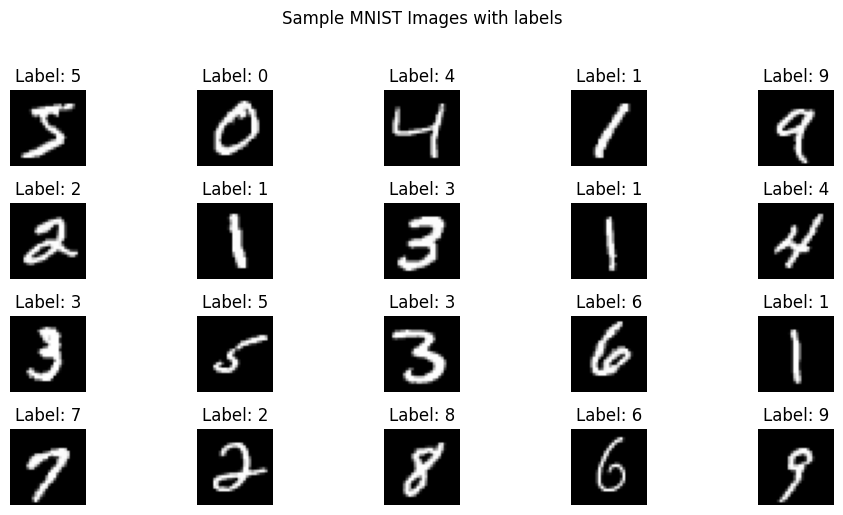

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {train_labels[i]}")
    plt.axis("off")
plt.suptitle("Sample MNIST Images with labels", y=1.02)
plt.tight_layout()
plt.show()

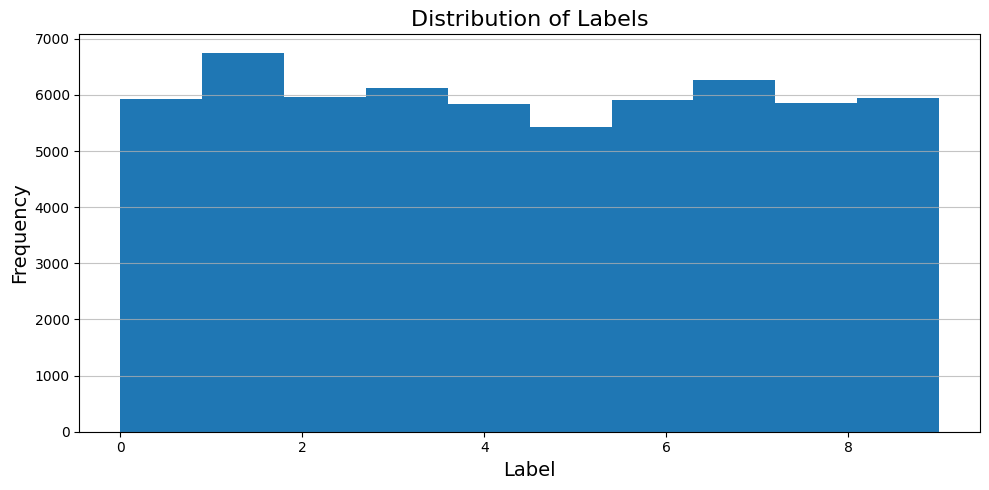

In [ ]:
# plot the distribution of labels
plt.figure(figsize=(10, 5))
plt.hist(train_labels, bins=10)
plt.title("Distribution of Labels", fontsize=16)
plt.xlabel("Label", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis="y", alpha=0.75)
plt.tight_layout()
plt.show()

In [ ]:
model = models.Sequential(
    [
        layers.Dense(512, activation="relu", input_shape=(28 * 28,)),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

c:\D-sim\pyprojs\DLRL_Internship\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_data=(test_images, test_labels),
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8724 - loss: 0.4392 - val_accuracy: 0.9653 - val_loss: 0.1132
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9736 - loss: 0.0899 - val_accuracy: 0.9754 - val_loss: 0.0767
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9820 - loss: 0.0577 - val_accuracy: 0.9753 - val_loss: 0.0773
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9888 - loss: 0.0359 - val_accuracy: 0.9758 - val_loss: 0.0793
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9903 - loss: 0.0288 - val_accuracy: 0.9792 - val_loss: 0.0683
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9937 - loss: 0.0190 - val_accuracy: 0.9790 - val_loss: 0.0708
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9955 - loss: 0.0146 - val_accuracy: 0.9782 - val_loss: 0.0782
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9956 - loss: 0.0128 - val_accuracy: 0.

In [ ]:
# test the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.9806 - loss: 0.0726
Test accuracy: 0.9805999994277954


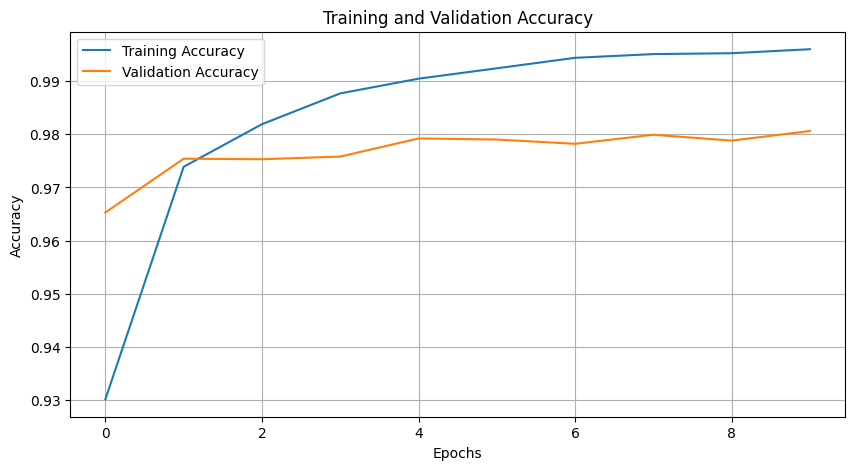

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [ ]:
def combined_loss(alpha=0.5):
    def loss(y_true, y_pred):
        mse = tf.mean_squared_error(y_true, y_pred)
        mae = tf.mean_absolute_error(y_true, y_pred)
        return alpha * mse + (1 - alpha) * mae

    return loss